<a href="https://colab.research.google.com/github/dcamcan1/MLA_DCC/blob/main/FinalProject_Regression_DCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Regression

## Danny Cannon

## CS-430-ON

## Machine Learning in the Cloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Imports for specific models

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Acquire Data

In [13]:
df = pd.read_csv('/content/gdrive/MyDrive/student-mat.csv', sep=';')
#Drop columns
df = df.drop(columns=['address', 'reason', 'guardian',  'failures', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher', 'internet', 'romantic', 'freetime', 'Dalc', 'Walc', 'G1', 'G2'])
df

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,activities,famrel,goout,health,absences,G3
0,GP,F,18,GT3,A,4,4,at_home,teacher,2,2,no,4,4,3,6,6
1,GP,F,17,GT3,T,1,1,at_home,other,1,2,no,5,3,3,4,6
2,GP,F,15,LE3,T,1,1,at_home,other,1,2,no,4,2,3,10,10
3,GP,F,15,GT3,T,4,2,health,services,1,3,yes,3,2,5,2,15
4,GP,F,16,GT3,T,3,3,other,other,1,2,no,4,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,2,2,services,services,1,2,no,5,4,4,11,9
391,MS,M,17,LE3,T,3,1,services,services,2,1,no,2,5,2,3,16
392,MS,M,21,GT3,T,1,1,other,other,1,1,no,5,3,3,3,7
393,MS,M,18,LE3,T,3,2,services,other,3,1,no,4,1,5,0,10


In [19]:
df.columns = ['School', 'Sex', 'Age', 'Family Size', 'Parent Cohab Status', 'Mother\'s Edu', 'Father\'s Edu', 'Mother\'s Job', 'Father\'s Job', 'Travel Time', 'Study Time', 'Extra Activities', 'Family Quality', 'Friend Outings', 'Health', 'Absences', 'Final Grade']
df

,School,Sex,Age,Family Size,Parent Cohab Status,Mother's Edu,Father's Edu,Mother's Job,Father's Job,Travel Time,Study Time,Extra Activities,Family Quality,Friend Outings,Health,Absences,Final Grade
0,GP,F,18,GT3,A,4,4,at_home,teacher,2,2,no,4,4,3,6,6
1,GP,F,17,GT3,T,1,1,at_home,other,1,2,no,5,3,3,4,6
2,GP,F,15,LE3,T,1,1,at_home,other,1,2,no,4,2,3,10,10
3,GP,F,15,GT3,T,4,2,health,services,1,3,yes,3,2,5,2,15
4,GP,F,16,GT3,T,3,3,other,other,1,2,no,4,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,LE3,A,2,2,services,services,1,2,no,5,4,4,11,9
391,MS,M,17,LE3,T,3,1,services,services,2,1,no,2,5,2,3,16
392,MS,M,21,GT3,T,1,1,other,other,1,1,no,5,3,3,3,7
393,MS,M,18,LE3,T,3,2,services,other,3,1,no,4,1,5,0,10


## Statistics and Visual Exploration

In [17]:
df.describe()

,Age,Mother's Edu,Father's Edu,Travel Time,Study Time,Family Relation Quality,Outings with Friends,Health,Absences,Final Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,3.944304,3.108861,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.896659,1.113278,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,4.000000,2.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,4.000000,3.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [23]:
grade_count = df['Final Grade'].value_counts()
df_counts = pd.DataFrame(grade_count.sort_index())
df_counts

,count
Final Grade,
0,38
4,1
5,7
6,15
7,9
8,32
9,28
10,56
11,47


<Figure size 1000x800 with 0 Axes>

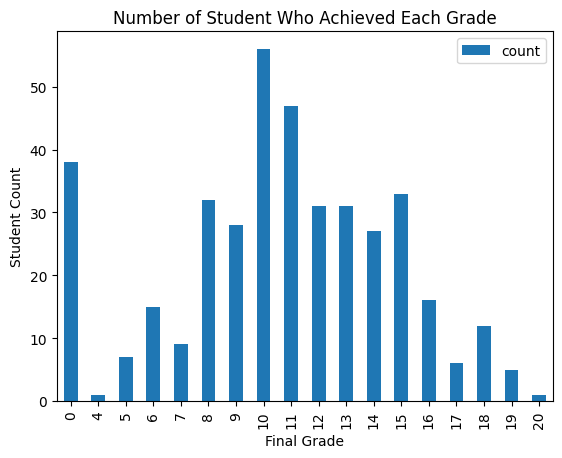

In [30]:
plt.figure(figsize=(10, 8))
df_counts.plot(kind='bar')
plt.title('Number of Student Who Achieved Each Grade')
plt.xlabel('Final Grade')
plt.ylabel('Student Count')
plt.show()

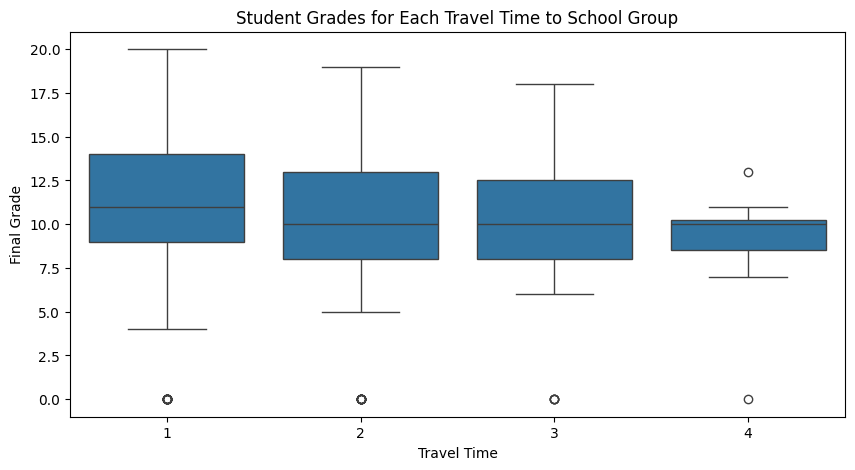

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Travel Time', y='Final Grade', data=df)
plt.title('Student Grades for Each Travel Time to School Group')
plt.xlabel('Travel Time')
plt.ylabel('Final Grade')
plt.show()

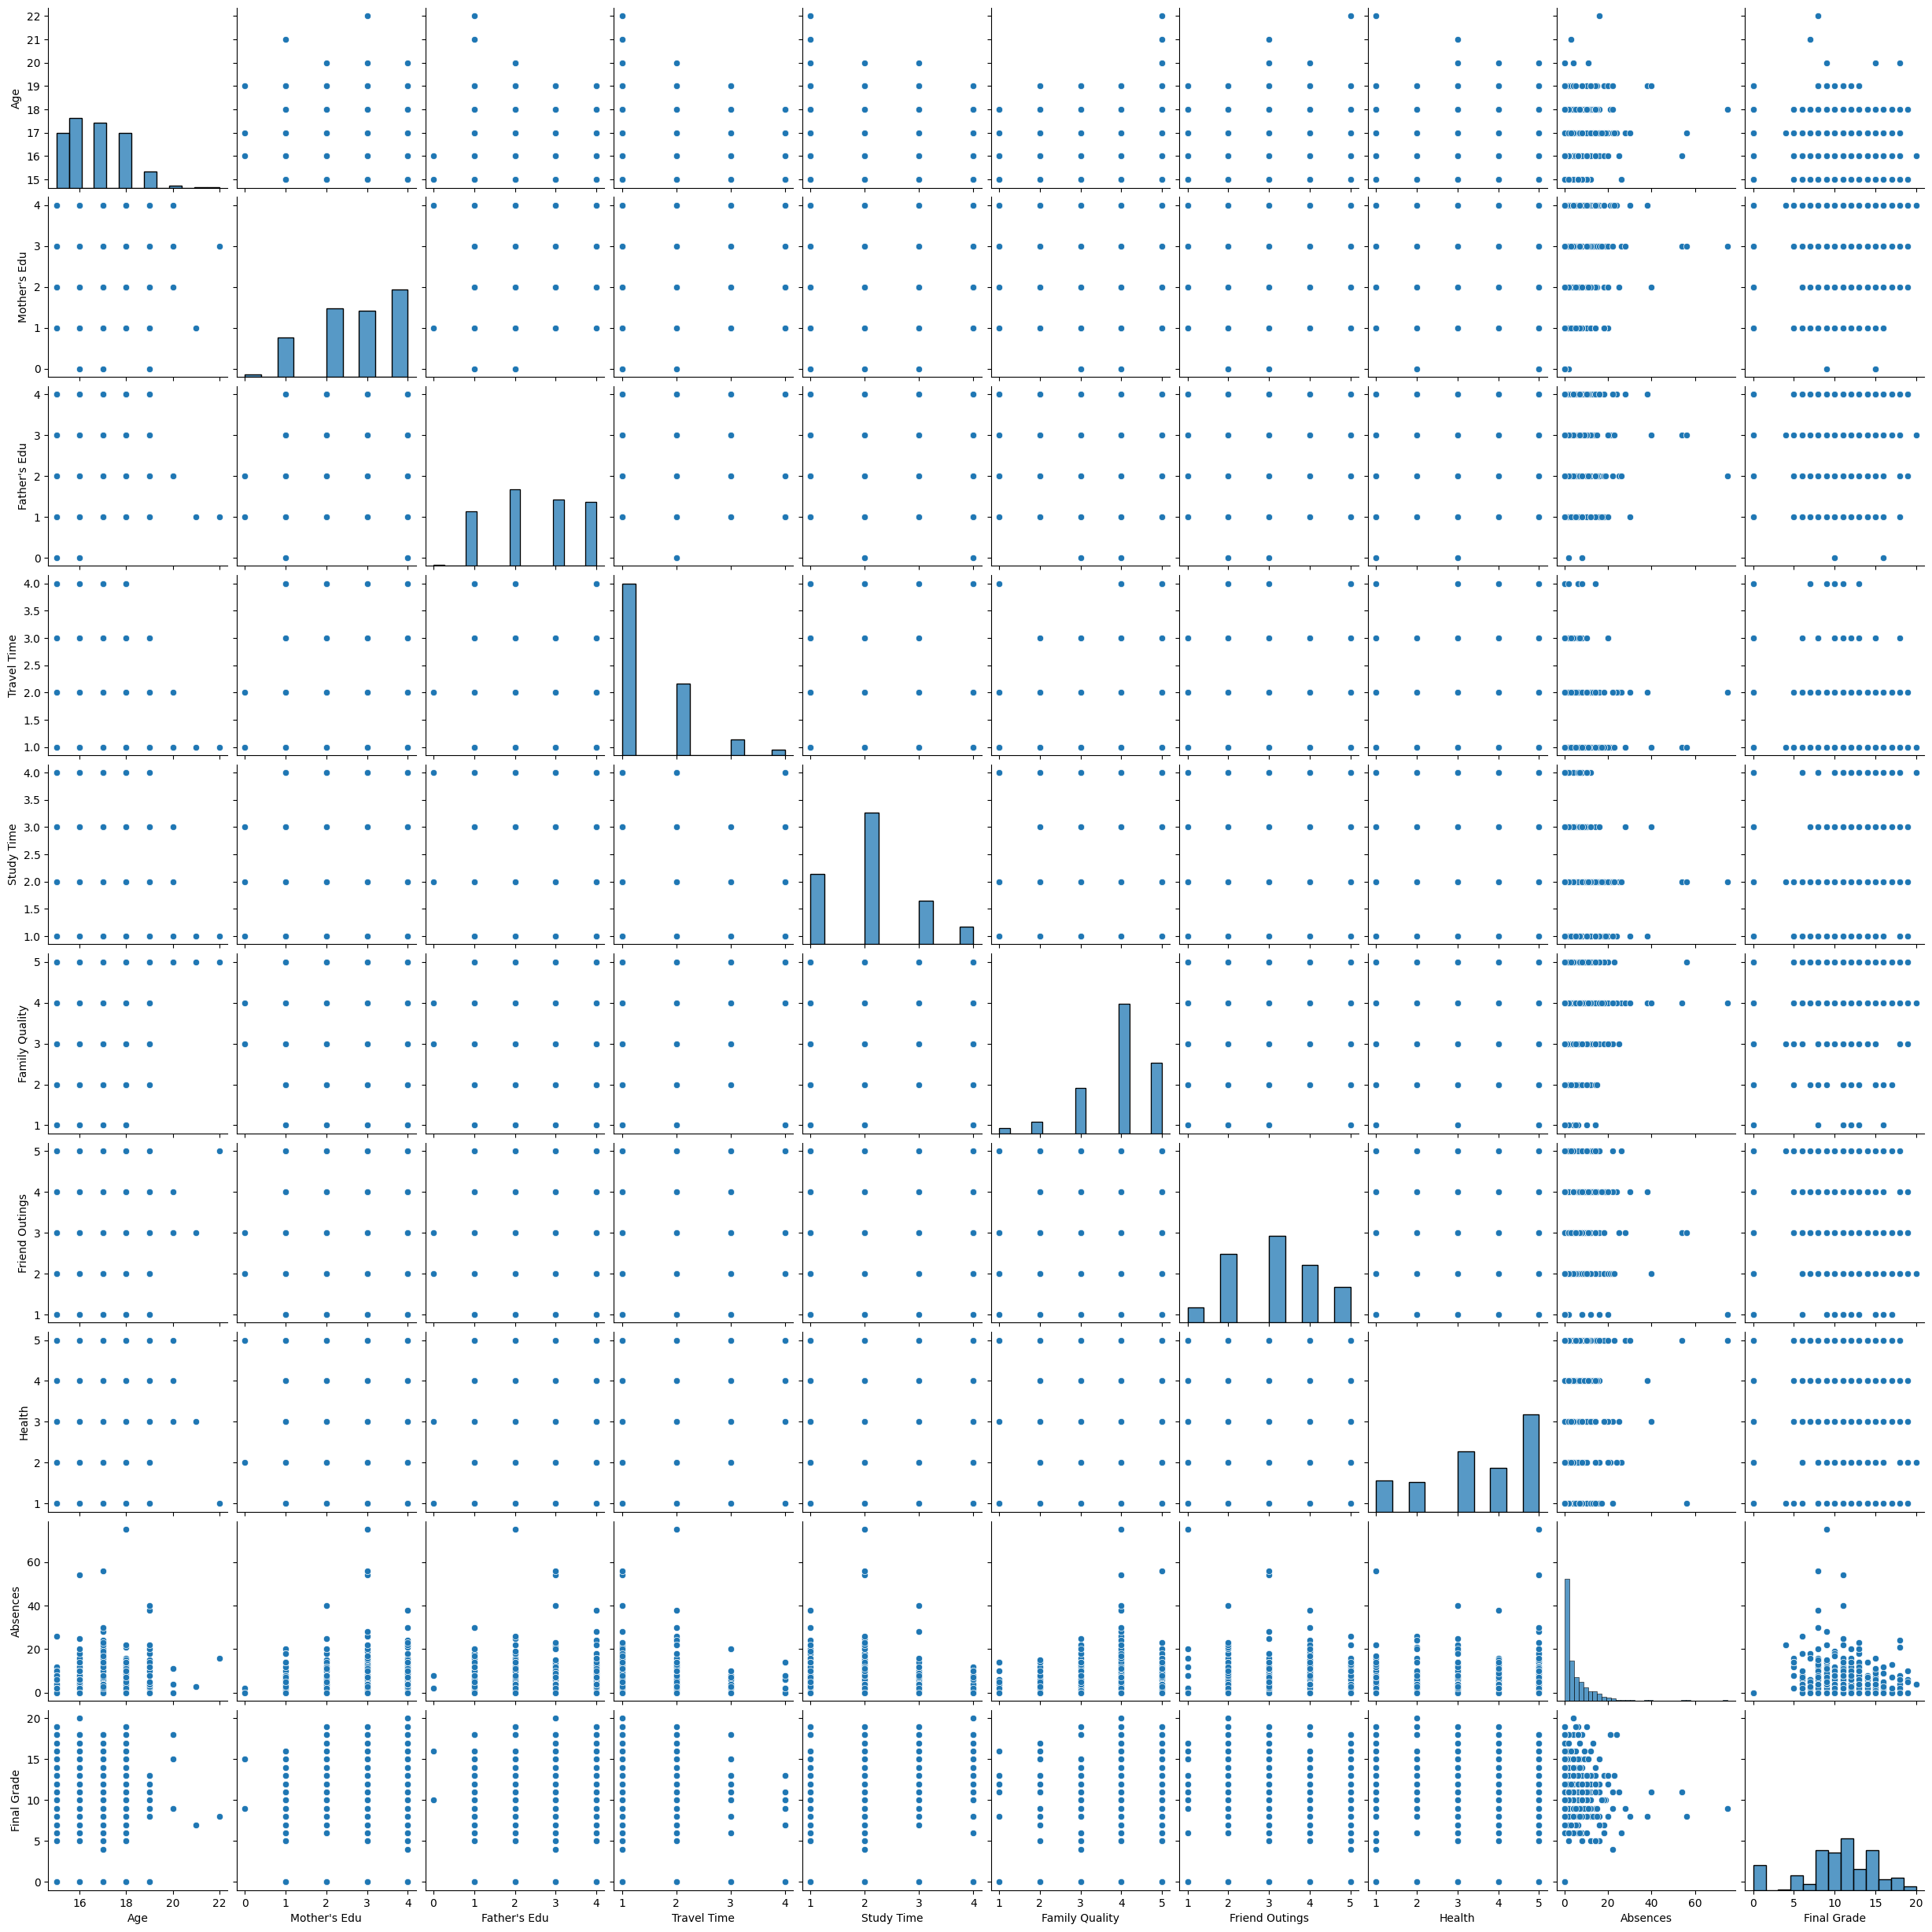

In [31]:
sns.pairplot(df)

### Things noticed
Number of absences somewhat correlates with final grade.

## Splitting Data into Train/Test

In [33]:
# Create a data frame called X of your inputs that includes all columns except for Final Grade
X = df.drop(['Final Grade'], axis=1)

In [34]:
# Create a data frame called y of your output that includes only the Quality of Sleep column. This will be your target variable that you are trying to predict.
y = df['Final Grade']

In [35]:
# Split the data into Train/Test sets. Use 20% of the data for testing. You should have 4 data frames: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Building the Pipeline / Linear Regression Model

In [37]:
# Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).
num_attribs = ['Age', 'Mother\'s Edu', 'Father\'s Edu', 'Travel Time', 'Study Time', 'Family Quality', 'Friend Outings', 'Health', 'Absences']
cat_attrib = ['School', 'Sex', 'Family Size', 'Parent Cohab Status', 'Mother\'s Job', 'Father\'s Job', 'Extra Activities']

col_transform = ColumnTransformer(transformers=[
  ('num', MinMaxScaler(), num_attribs),
  ('cat', OneHotEncoder(), cat_attrib)
], remainder='passthrough')

## Execute the Model / Linear Regression Model

In [40]:
# Create a pipeline that will transform the data and then run a Linear Regression
pipeline = Pipeline(steps=[
  ('transform', col_transform),
  ('model', LinearRegression())
])

set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Age', "Mother's Edu",
                                                   "Father's Edu",
                                                   'Travel Time', 'Study Time',
                                                   'Family Quality',
                                                   'Friend Outings', 'Health',
                                                   'Absences']),
                                                 ('cat', OneHotEncoder(),
                                                  ['School', 'Sex',
                                                   'Family Size',
                                                   'Parent Cohab Status',
                                                   "Mother's Job",
                                                   "Father's Job",
                                                   'Extra Activities'])])),
                ('model', LinearRegression())])

In [41]:
# Run the pipeline to fit the Linear Regression Model.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Age', "Mother's Edu",
                                                   "Father's Edu",
                                                   'Travel Time', 'Study Time',
                                                   'Family Quality',
                                                   'Friend Outings', 'Health',
                                                   'Absences']),
                                                 ('cat', OneHotEncoder(),
                                                  ['School', 'Sex',
                                                   'Family Size',
                                                   'Parent Cohab Status',
                                                   "Mother's Job",
                                                   "Father's Job",
                                                   'Extra Activities'])])),
                ('model', LinearRegression())])

## 7a. Evaluating the Model / Linear Regression Model

In [42]:
# Run the pipeline to predict y values from the test data set and save them in a variable called y_pred
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [43]:
# Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

3.931033719976838
5.358877055049802


# The RMSEs suggest that the deviation is relatively high and the model could use improving.

In [44]:
r2_score(y_test, y_test_pred)

-0.04091201461244487

## Building the Pipeline / SVM Model

In [47]:
# Create a column transformer that will OneHotEncode the categorical variables and scale the numerical variables (not the output).
num_attribs = ['Age', 'Mother\'s Edu', 'Father\'s Edu', 'Travel Time', 'Study Time', 'Family Quality', 'Friend Outings', 'Health', 'Absences']
cat_attrib = ['School', 'Sex', 'Family Size', 'Parent Cohab Status', 'Mother\'s Job', 'Father\'s Job', 'Extra Activities']

col_transform = ColumnTransformer(transformers=[
  ('num', StandardScaler(), num_attribs),
  ('cat', OneHotEncoder(), cat_attrib)
], remainder='passthrough')

## 6b. Execute the Model / SVM Model

In [54]:
# Create a pipeline that will transform the data and then run a Support Vector Machine Regression
pipeline = Pipeline(steps=[
  ('col_transform', col_transform),
  ('SVR', SVR(kernel='linear', C=50, max_iter=200000, epsilon=0.0))
])

pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', "Mother's Edu",
                                                   "Father's Edu",
                                                   'Travel Time', 'Study Time',
                                                   'Family Quality',
                                                   'Friend Outings', 'Health',
                                                   'Absences']),
                                                 ('cat', OneHotEncoder(),
                                                  ['School', 'Sex',
                                                   'Family Size',
                                                   'Parent Cohab Status',
                                                   "Mother's Job",
                                                   "Father's Job",
                                                   'Extra Activities'])])),
                ('SVR',
                 SVR(C=50, epsilon=0.0, kernel='linear', max_iter=200000))])

## 7b. Evaluating the Model / SVM Model

In [63]:
y_pred = pipeline.predict(X_test)
print(mean_squared_error(y_test, y_pred)**(0.5))
print(mean_absolute_error(y_test, y_pred))

5.4844329582544225
4.2085053753355455


In [65]:
r2_score(y_test, y_test_pred)

-0.04091201461244487

# The two models seem similarly poor at predicting Final Grades for students.